In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data_penjualan.csv', usecols=['ReceiptNumber', 'Date', 'Items', 'Quantity', 'NetSales'])

In [12]:
df.head(10)

,ReceiptNumber,Date,Items,Quantity,NetSales
0,TSBZIO,1/1/2023,Lemon Tea,1.0,14400.0
1,TSBZIP,1/1/2023,Lychee Tea,1.0,20800.0
2,TSBZIP,1/1/2023,Kopi Rakyat,1.0,16000.0
3,TSBZIR,1/1/2023,Kopi Rakyat,3.0,78000.0
4,TSBZIR,1/1/2023,Kopi Rakyat,1.0,26000.0
5,TSBZIT,1/1/2023,Kopi Dewan,1.0,27000.0
6,TSBZIU,1/1/2023,Kopi Rakyat,1.0,20000.0
7,TSBZIU,1/1/2023,Vanilla Latte,1.0,28000.0
8,TSBZIV,1/1/2023,Kopi Rakyat,2.0,40000.0
9,TSBZIW,1/1/2023,Kopi Rakyat,1.0,20000.0


In [13]:
df.dtypes

ReceiptNumber     object
Date              object
Items             object
Quantity         float64
NetSales         float64
dtype: object

In [14]:
#recency

day='2023-09-30'
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df['Date'])

recency = df.groupby(['Items']).agg({'Date': lambda x: ((day-x.max()).days)})
recency.head()

,Date
Items,
,234
Aglio Oglio,239
Aglio Oglio,122
Aglio Oglio,140
Almond Croissant,122


In [15]:
#frecuency

freq=df.drop_duplicates(subset="ReceiptNumber").groupby(["Items"])[["ReceiptNumber"]].count()

In [16]:
freq.head(10)

,ReceiptNumber
Items,
,15
Aglio Oglio,1
Aglio Oglio,45
Aglio Oglio,4
Almond Croissant,29
Black Coffee,31
Black Coffee,19
Black Coffee,92
Black Coffee,33


In [17]:
df["total"] = df["NetSales"]*df["Quantity"]

In [18]:
money = df.groupby(['Items'])[['total']].sum()
money

,total
Items,
,1086400.0
Aglio Oglio,40000.0
Aglio Oglio,6044000.0
Aglio Oglio,336000.0
Almond Croissant,2119000.0
...,...
Thai Tea,1338000.0
Vanilla Latte,857200.0
Vanilla Latte,126000.0


In [19]:
df.dtypes

ReceiptNumber            object
Date             datetime64[ns]
Items                    object
Quantity                float64
NetSales                float64
total                   float64
dtype: object

In [20]:
RFM=pd.concat([recency,freq,money],axis=1)
recency.columns=["Recency"]
freq.columns=["Frecuency"]
money.columns=["Monetary"]



In [59]:
RFM

,Date,ReceiptNumber,total
Items,,,
,234,15.0,1086400.0
Aglio Oglio,239,1.0,40000.0
Aglio Oglio,122,45.0,6044000.0
Aglio Oglio,140,4.0,336000.0
Almond Croissant,122,29.0,2119000.0
...,...,...,...
Thai Tea,123,12.0,1338000.0
Vanilla Latte,248,12.0,857200.0
Vanilla Latte,243,4.0,126000.0


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sim = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = sim.fit_transform(RFM)

scaler=StandardScaler()
scaled=scaler.fit_transform(imputed_data)




c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

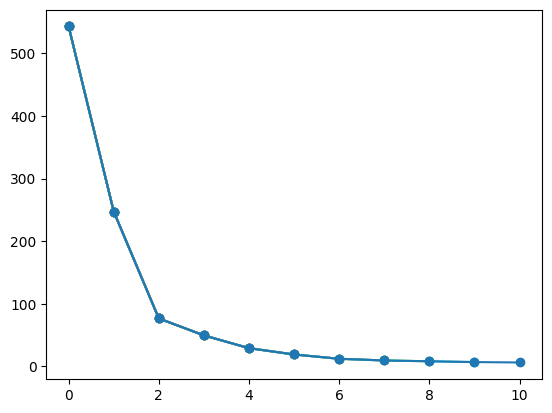

In [29]:
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,12):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    plt.plot(inertia, marker='o')
    